In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.integrate import *

# Вычисление интеграла

In [3]:
# define function
def func(x):
    return x**3
#define limits
x_low = 0
x_high = 1
#integral and error output
I, err = quad(func, x_low, x_high)
print (f'I = {I}, err = {err}')

I = 0.25, err = 2.7755575615628914e-15


# Интерполяция

In [4]:
from scipy.interpolate import *

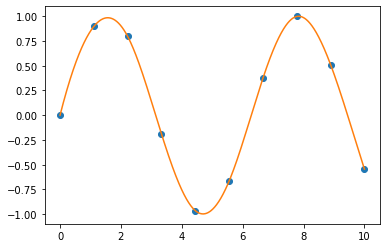

In [6]:
# raw data
x_given = np.linspace(0,10,10)
y_given = np.sin(x_given)
# interpolated x data
x_i = np.linspace(0,10,1000)
#interpolation 1d
f_linear = interp1d(x_given, y_given, kind='cubic') # by default it is linear kind 
# creating interpolated y data
y_is = f_linear(x_i)
#plot result
plt.plot(x_given,y_given, 'o')
plt.plot(x_i, y_is)

# Сглаживание полиномом 

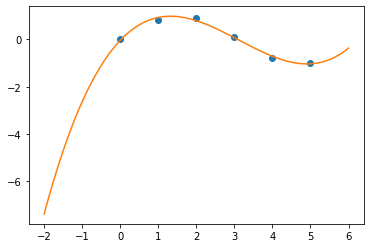

In [5]:
# raw data 
x_given = np.arange(0,6.)
y_given = np.array([0,0.8, 0.9, 0.1, -0.8,-1.0])
# generating of x data for polynomal fit
x_p = np.linspace(-2,6,100)
#fitting
p3 = np.polyfit(x_given, y_given,3) #3 is polynom rang
#generating y polynom data
y_p = np.polyval(p3,x_p)
# plot result
plt.plot(x_given, y_given, 'o')
plt.plot(x_p, y_p)

# Оптимизация функцией

In [7]:
from scipy.optimize import *


In [8]:
# simulate of raw data

# main function
def func(x,a,b,c):
    return a*np.exp(-b*x) + c
#'raw' data
x_given = np.linspace(0,4,50)
y_given = func(x_given, 2.5,1.3,0.5) + 0.2*np.random.normal(size = len(x_given)) #make random for simulate real data

In [9]:
# curve fitting according or function
params, extras = curve_fit(func, x_given, y_given)


In [10]:
# params of optimisation
params

array([2.4052882 , 1.43373625, 0.56027503])

In [11]:
extras

array([[ 0.01874844,  0.0093507 , -0.00076304],
       [ 0.0093507 ,  0.02855773,  0.00631988],
       [-0.00076304,  0.00631988,  0.00290187]])

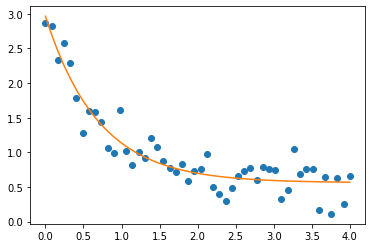

In [12]:
#plot 'raw' data
plt.plot(x_given, y_given, 'o')
#plot fitted curve
plt.plot(x_given, func(x_given, params[0], params[1], params[2]))

# Решение нелинейных уравнений

In [14]:
# define function
def func(x):
    return x**2-4
#result
res1 = fsolve(func, 1) #'1' is our guess
print(res1) # one root
res2 = fsolve(func, -10)
print(res2)

[2.]
[-2.]


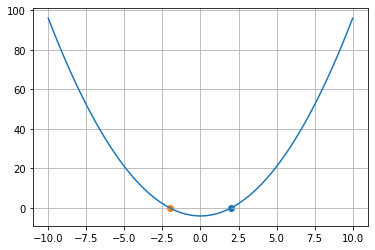

In [15]:
#plotting
x_given = np.linspace(-10,10,100)
plt.grid()
plt.scatter(res1,0) #res1
plt.scatter(res2,0) #res2
plt.plot(x_given,func(x_given))

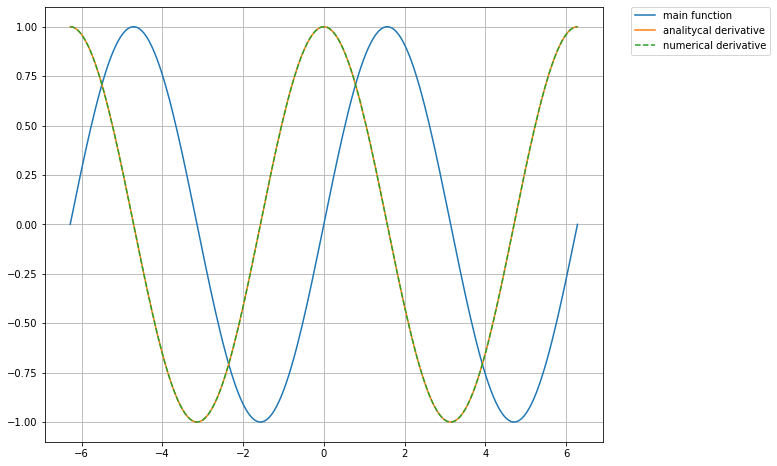

In [16]:
# gradient (derivative)

# generate data
x = np.linspace(-2*np.pi,2*np.pi,200)
#func
y = np.sin(x)
#analytical derivative
dy = np.cos(x)
#numerical derivative
dy_num = np.gradient(y,x)

#plotting
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x,y, label='main function')
ax.plot(x,dy, label='analitycal derivative')
ax.plot(x,dy,'--', label='numerical derivative')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid()

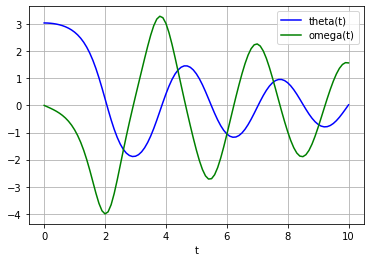

In [18]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# Более продвинутое построение графиков

![Иерархия построения в матплотлибе](./images/figure-matplotlib.jpg)

## Предпочтительный способ создания объекта Figure с одним объектом Axes под ОО-подходом (не самый интуитивный способ) – это использовать plt.subplots(). (Это единственный раз, когда ОО — подход использует pyplot для создания объектов Figure и Axes).

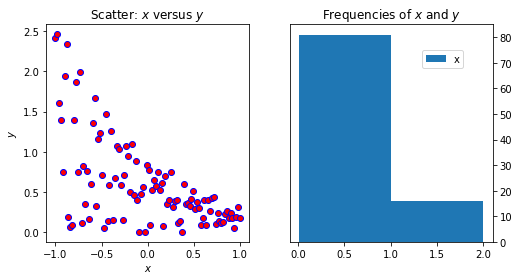

In [46]:
x = np.linspace(-1,1,100)
y = np.exp(-x)*np.random.rand(100)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2.hist(
    y, bins=np.arange(y.min(), y.max()),
    label=('x', 'y')
)
 
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
 
plt.show()